In [0]:
#importing library
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
boston = load_boston()
import seaborn as sns

## 1.Data Preprocessing

In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [0]:
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

## 2.Spliting the data into test and train

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


## 3.Sklearn linearRegression

In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred_sk = lm.predict(X_test)

In [37]:
print('Root means score', np.sqrt(mean_squared_error(Y_test, Y_pred_sk)))

Root means score 5.341391089030515


In [0]:
d1 = {'True Labels': Y_test, 'Predicted Labels': Y_pred_sk}
SK = pd.DataFrame(data = d1)
SK.head(10)

,Predicted Labels,True Labels
226,37.467236,37.6
292,31.391547,27.9
90,27.120196,22.6
373,6.468433,13.8
273,33.629667,35.2
417,5.670680,10.4
503,27.039467,23.9
234,29.927047,29.0
111,26.356613,22.8
472,22.452460,23.2


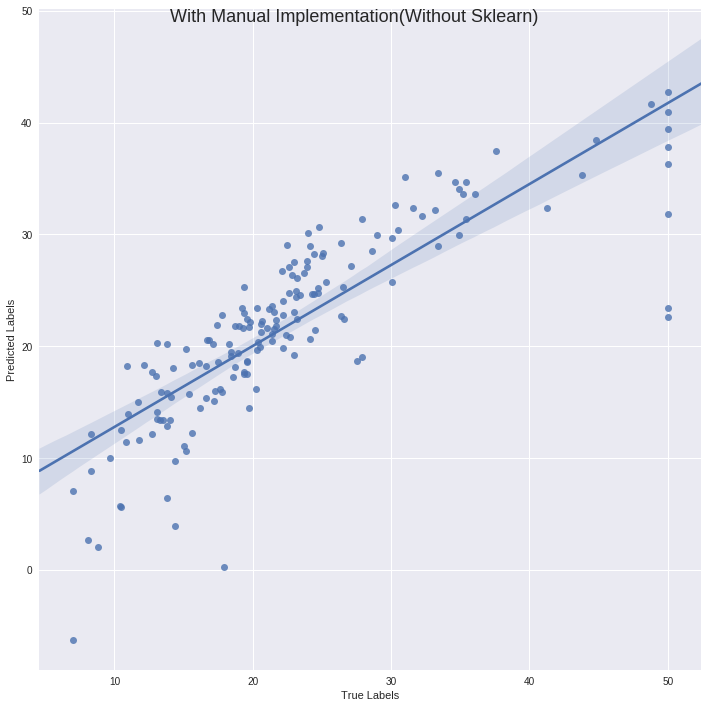

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("With Manual Implementation(Without Sklearn)", fontsize=18)
sns.set(font_scale = 1.5)

PDF of error


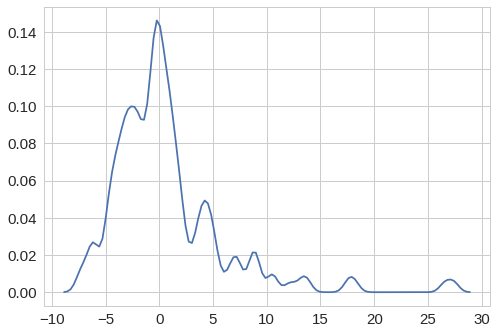

In [0]:
delta_y = Y_test - Y_pred_sk

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
print("PDF of error")
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


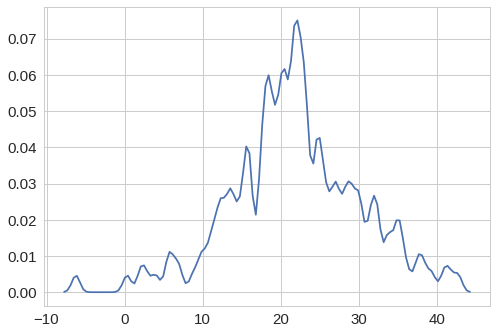

In [0]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred_sk), bw=0.5)
plt.show()

## 4.linearRegression from scratch

In [0]:
class SGDLinearRegression(BaseEstimator):
    
    def __init__(self,max_iter=1000, lrrate=0.0001, tol=0.0001, batch_size=50):
        self.max_iter = max_iter
        self.lrrate = lrrate
        self.tol = tol
        self.batch_size = batch_size
        
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        rows, features = X.shape
        
        # Initialize coef and intercept
        self.coef_ = np.zeros(features)
        self.intercept_ = 0.0
        
        self.optimize(X, y)
        return self
    
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_
    def sample(self, X, y):
        """
        returns a random sample of rows
        """
        idx = np.random.randint(X.shape[0], size=self.batch_size)
        return X[idx,:], y[idx]
    
    def optimize(self, X, y):
        """
        Optimizes the coef_ and intercept
        for lower squared errors
        """
        for i in range(1, self.max_iter + 1):
            
            # Save previous
            prev_coef = self.coef_
            prev_intercept = self.intercept_
            
            # Take a sample
            X_sample, y_sample = self.sample(X, y)
            
            
            pred = self.predict(X_sample)
            diff = y_sample - pred
            
            
            # compute gradients
            coef_grad = -2 * np.dot(X_sample.T, diff)
            intercept_grad = -2 * np.sum(diff)
            
            # update coef_ and intercept
            self.coef_ = self.coef_ - (self.lrrate / i) * coef_grad
            self.intercept_ = self.intercept_ - (self.lrrate / i) * intercept_grad
            # Compute diff of intercept and coef
            coef_diff = np.linalg.norm(self.coef_ - prev_coef)
            intercept_diff = self.intercept_ - prev_intercept
            
            # if diff is less than tolerence then terminate
            if coef_diff < self.tol and intercept_diff < self.tol:
                break

In [0]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [0]:
model = SGDLinearRegression(lrrate=0.005)
model.fit(X_scaled, Y_train)

SGDLinearRegression(batch_size=50, lrrate=0.005, max_iter=1000, tol=0.0001)

In [0]:
Y_manualLR = model.predict(X_test_scaled)
print('Root means score', np.sqrt(mean_squared_error(Y_test, Y_manualLR)))

Root means score 5.525843749263238


In [0]:
d1 = {'True Labels': Y_test, 'Predicted Labels': Y_manualLR}
manualLR = pd.DataFrame(data = d1)
manualLR.head(10)

,Predicted Labels,True Labels
226,36.721844,37.6
292,28.959084,27.9
90,27.182456,22.6
373,4.019590,13.8
273,33.063785,35.2
417,5.573790,10.4
503,27.574740,23.9
234,29.010645,29.0
111,26.966695,22.8
472,20.818575,23.2


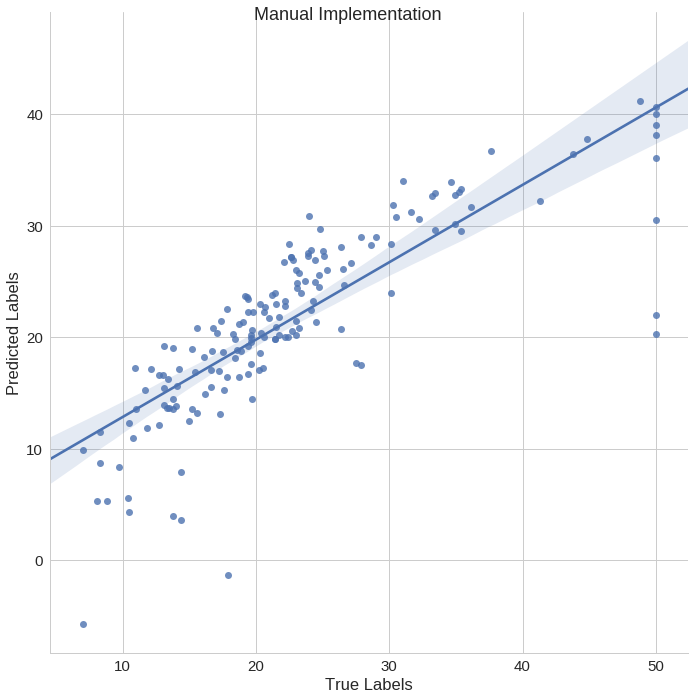

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = manualLR, size = 10)

fig1 = lm1.fig 

fig1.suptitle("Manual Implementation", fontsize=18)

sns.set(font_scale = 1.5)

PDF of error


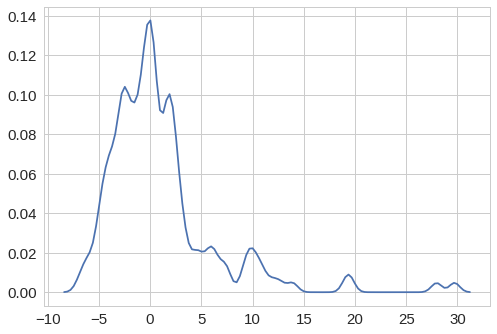

In [0]:
delta1_y = Y_test - Y_manualLR

import seaborn as sns;
import numpy as np;
print("PDF of error")
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta1_y), bw=0.5)
plt.show()



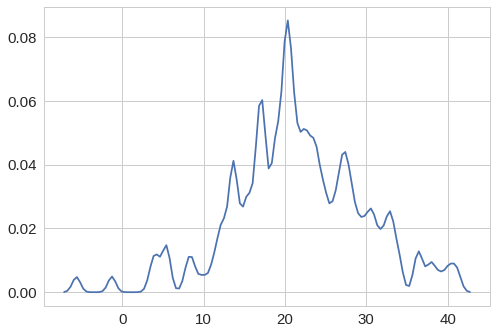

In [0]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_manualLR), bw=0.5)
plt.show()

## 5.comparing

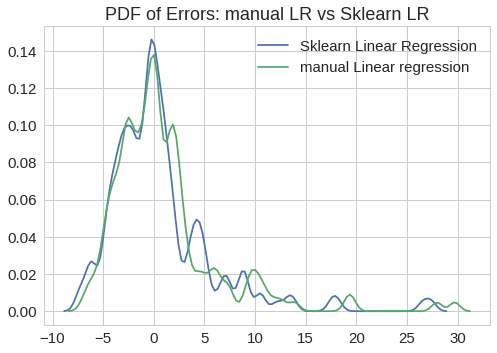

In [36]:
import seaborn as sns
import numpy as np

# Calculate the errors
delta_y = Y_test - Y_pred_sk
delta_y_manualLR = Y_test - Y_manualLR

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5, label="Sklearn Linear Regression")
sns.kdeplot(np.array(delta_y_manualLR), bw=0.5, label="manual Linear regression")
plt.legend()
plt.title('PDF of Errors: manual LR vs Sklearn LR')
plt.show()

## 6.Conclusion

In [38]:
SGD = {

'Model': ['Sklearn Linear Regession', 'Manual Linear Regression'],
'Mean Square Error': ['5.341391089030515', '5.525843749263238']
}
pd.DataFrame(SGD)

,Mean Square Error,Model
0,5.341391089030515,Sklearn Linear Regession
1,5.525843749263238,Manual Linear Regression
